<a href="https://colab.research.google.com/github/FadlilaAfida/MachineLearning_2023/blob/main/Tugas_Jobsheet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS PRAKTIKUM CLUSTERING KELOMPOK 6**

---

## **Nama Angota :**
#Afifah Nova Kurnia Rahmadani(2141720103)
#Ahmad Rifki Fauzi(2141720028)
#Alfino Febry Krissaputra(2141720187)
#Fadlila Afida(2141720130)
#Yuliyana Rahmawati(2141720241)


---



## **KELAS : 3B**


### **TUGAS**

**Buatlah sebuah model K-Means dengan ketentuan,**

**1. Gunakan data 'Mall_Customers.csv'**




*   Persiapan Data



In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




*  Lakukan Pengecakan NIlai Hilang



In [ ]:
# Check for missing values
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

**2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)**

In [ ]:
df.drop(['CustomerID'], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40




*   Tampilan Pairplot



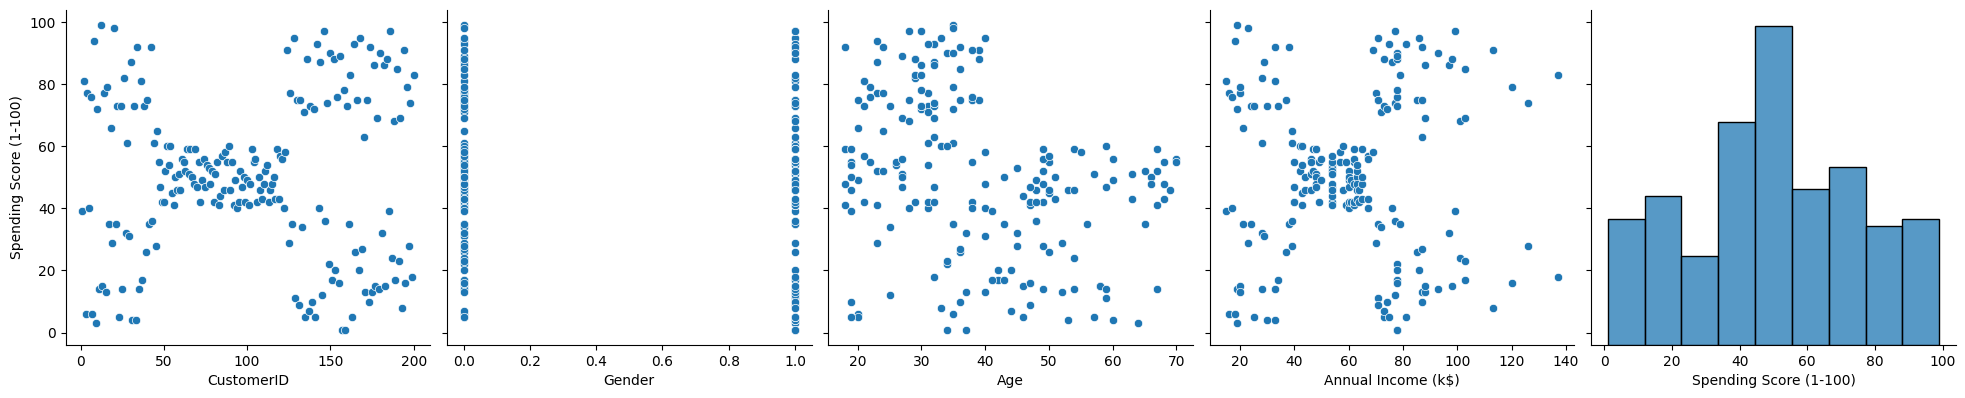

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

sns.pairplot(df, x_vars=df.columns,
             y_vars=df.columns[-1], height=4, aspect=1, kind='scatter')
plt.show()

**3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.**

In [ ]:
# training model
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

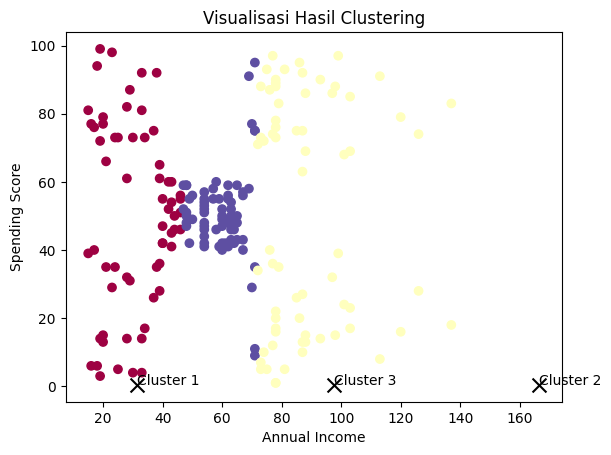

In [ ]:
# Prediksi cluster dari setiap data point
cluster_predictions = kmeans.predict(df)

# Tambahkan kolom cluster_predictions ke dataframe
df['Cluster'] = cluster_predictions

# Plot data
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='Spectral')

# Tambahkan label untuk setiap cluster
for i in range(3):
    center = kmeans.cluster_centers_[i]
    plt.scatter(center[0], center[1], marker='x', c='black', s=100)
    plt.annotate(f'Cluster {i + 1}', (center[0], center[1]))

# Tambahkan judul dan label sumbu
plt.title('Visualisasi Hasil Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.show()

**4. Buatlah  implementasi model SOM untuk segmentasi citra lain**



*   Install Minisom



In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=9bd2e62050ffe6195ff99dd8770d46e6120afe40d28c0b35f2fd2200c2f6fca5
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io



*   Fungsi untuk menginisialisasi bobot SOM




In [ ]:
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])



*   Fungsi untuk menghitung jarak antara vektor input dan bobot SOM



In [ ]:
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)



*  Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)



In [ ]:
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)



*   Fungsi untuk memperbarui bobot SOM



In [ ]:
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(
        weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * \
        influence[:, :, np.newaxis] * (input_vector - weights)



*   Melatih SOM



In [ ]:
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    # Ukuran SOM sesuai dengan jumlah saluran warna
    som_shape = (32, 32, input_shape[2])
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * \
            np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner,
                               learning_rate, neighborhood_radius)

    return weights

In [ ]:
polinema_path = "grapol.png"
# Normalisasi intensitas piksel menjadi rentang [0, 1]
path= io.imread(polinema_path) / 255.0

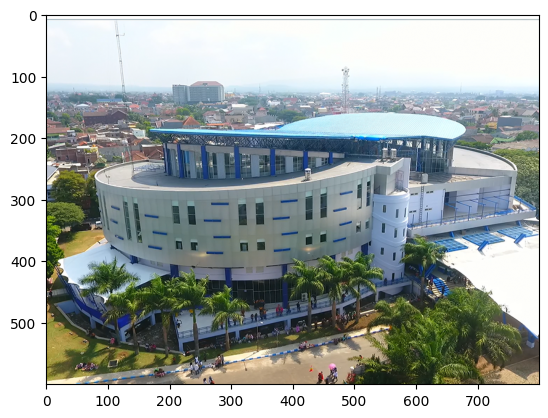

In [ ]:
plt.imshow(path)



*   latih SOM



In [ ]:
num_epochs = 10
initial_learning_rate = 0.1
initial_neighborhood_radius = 1
trained_weights = train_som(path, num_epochs, initial_learning_rate, initial_neighborhood_radius)



*   Visual Bobot SOM



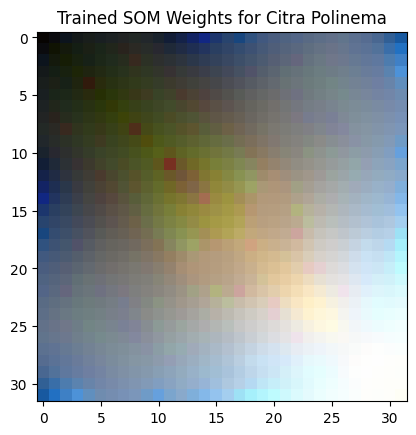

In [ ]:
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Citra Polinema')
plt.show()